# TITLE: **`ADIDAS SALES ANALYSIS ACROSS THE US`**
## 1. **Business Understanding**

- This projects aims to make a detailed analysis on US adidas sales

- In this project, we aim to find out:

a). What is the total sales revenue across all countries?  
b). Which region generates the highest profit, and which has the lowest?  
c). What is the sales contribution (%) of each market?   
d). How do monthly sales and profits vary across the year?  
e). Which months show the highest discounts given, and how does this impact profit?   
f). What are the top 5 most profitable product subcategories?   
g). Which product has the highest sales volume, and in which market is it sold the most?   
h). What is the average order value (AOV) for each customer segment?   
i). Which customer has the highest total sales, and what is their order frequency?   
j). Which city has the highest sales, and what is the associated profit margin?   
k). How do sales and profits vary across regions and countries?   
l). What is the overall discount percentage, and how does it affect profit margins?   
m). How many orders fall into negative profit, and which segments are affected the most?   
n). What is the profit-to-sales ratio for each product category and subcategory?   
o). Which market or region has the highest average order size (sales per order)?  
 

## 2. **Data Undertanding**

Here's a **table describing each column**:

| Column Name          | Description                                                               |
| -------------------- | ------------------------------------------------------------------------- |
| **Retailer**         | Name of the company or store selling the product                          |
| **Retailer ID**      | Unique identifier for each retailer                                       |
| **Invoice Date**     | Date when the sale was recorded or invoiced                               |
| **Region**           | Geographic region where the sale took place (e.g., East, West, etc.)      |
| **State**            | U.S. state where the sale occurred                                        |
| **City**             | City where the sale was made                                              |
| **Product**          | Name or type of product sold                                              |
| **Price per Unit**   | Price of a single unit of the product                                     |
| **Units Sold**       | Number of product units sold in the transaction                           |
| **Total Sales**      | Total revenue from the sale (Price per Unit × Units Sold)                 |
| **Operating Profit** | Profit made after subtracting operating costs from Total Sales            |
| **Operating Margin** | Operating Profit as a percentage of Total Sales                           |
| **Sales Method**     | Channel through which the product was sold (e.g., Online, In-store, etc.) |


In [73]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Load dataset
data = pd.read_excel("../Data Sets/Adidas US Sales Datasets.xlsx")


data.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [75]:
# Check shape of data
print(f"The data has {data.shape[1]} columns and {data.shape[0]} rows")

The data has 14 columns and 9648 rows


In [76]:
# Check for data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   Retailer          9648 non-null   object        
 2   Retailer ID       9648 non-null   int64         
 3   Invoice Date      9648 non-null   datetime64[ns]
 4   Region            9648 non-null   object        
 5   State             9648 non-null   object        
 6   City              9648 non-null   object        
 7   Product           9648 non-null   object        
 8   Price per Unit    9648 non-null   float64       
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

In [77]:
# Check for data index
data.index

RangeIndex(start=0, stop=9648, step=1)

In [78]:
# Drop the first irrelevant column - "Unnamed: 0"
data.drop("Unnamed: 0", axis=1, inplace=True)

data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [79]:
# Check new shape of the data
print(f"The data has {data.shape[1]} columns and {data.shape[0]} rows")

The data has 13 columns and 9648 rows


In [80]:
# Check for null values in the dataset
for col in data.columns:
    print(f'There are {data[col].isna().sum()} null values in {col}')

There are 0 null values in Retailer
There are 0 null values in Retailer ID
There are 0 null values in Invoice Date
There are 0 null values in Region
There are 0 null values in State
There are 0 null values in City
There are 0 null values in Product
There are 0 null values in Price per Unit
There are 0 null values in Units Sold
There are 0 null values in Total Sales
There are 0 null values in Operating Profit
There are 0 null values in Operating Margin
There are 0 null values in Sales Method


In [81]:
# Check for duplicates in the dataset
print(f"There are {data.duplicated().sum()} duplicates in the dataset")

There are 0 duplicates in the dataset


In [82]:
# Describe the numerical columns in the dataset
data.describe().T.style.format("{:,.2f}")

,count,mean,min,25%,50%,75%,max,std
Retailer ID,"9,648.00","1,173,849.72","1,128,299.00","1,185,732.00","1,185,732.00","1,185,732.00","1,197,831.00","26,360.38"
Invoice Date,"9,648.00",",.2f",",.2f",",.2f",",.2f",",.2f",",.2f",nan
Price per Unit,"9,648.00",45.22,7.00,35.00,45.00,55.00,110.00,14.71
Units Sold,"9,648.00",256.93,0.00,106.00,176.00,350.00,"1,275.00",214.25
Total Sales,"9,648.00","93,273.44",0.00,"4,254.50","9,576.00","150,000.00","825,000.00","141,916.02"
Operating Profit,"9,648.00","34,425.24",0.00,"1,921.75","4,371.42","52,062.50","390,000.00","54,193.11"
Operating Margin,"9,648.00",0.42,0.10,0.35,0.41,0.49,0.80,0.10


In [83]:
# Describe the objaect columns in the dataset
data.describe(include="O").T.style.format({
    'count': '{:,}',
    'freq': '{:,}'
})

,count,unique,top,freq
Retailer,"9,648",6,Foot Locker,"2,637"
Region,"9,648",5,West,"2,448"
State,"9,648",50,Texas,432
City,"9,648",52,Portland,360
Product,"9,648",6,Men's Street Footwear,"1,610"
Sales Method,"9,648",3,Online,"4,889"


## **Exploratory Data Analysis**

### **Check for Outliers**

In [89]:
# Check for outliers in the numerical columns
num_cols = data.select_dtypes(exclude="O")

num_cols.columns

Index(['Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin'],
      dtype='object')

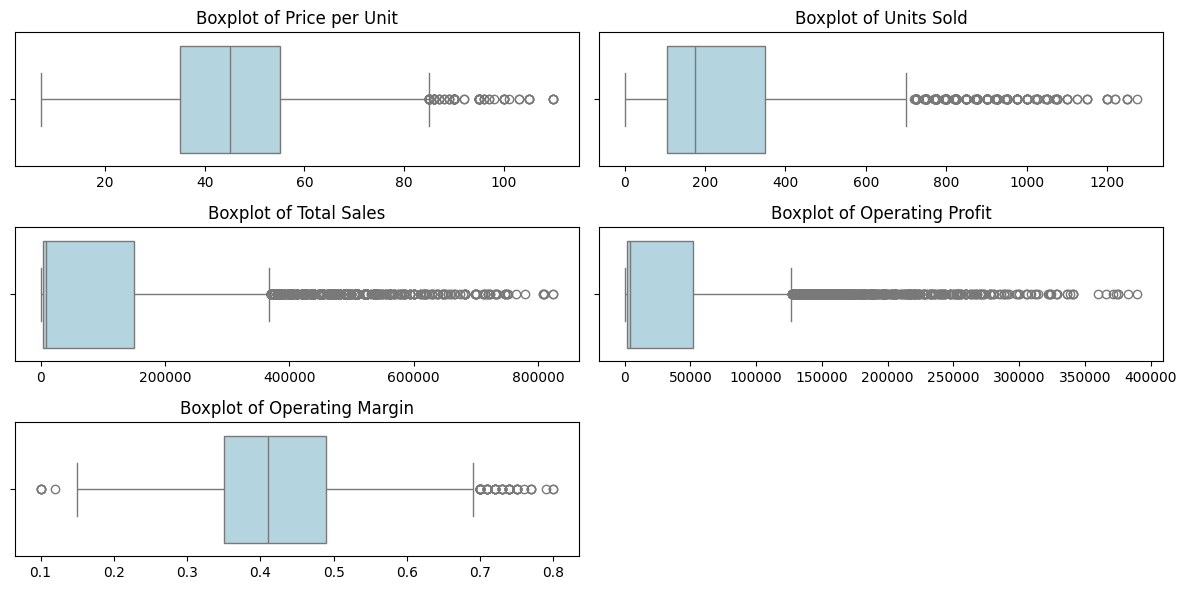

In [95]:
# Get only relevant columns from the numerical columns
rel_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']

# Create 2x2 subplots + 1 extra row
fig, axs = plt.subplots(3, 2, figsize=(12, 6)) 

axs = axs.flatten()  # Flatten to make it easier to loop through

# Plot each boxplot
for i, col in enumerate(rel_cols):
    sns.boxplot(x=data[col], ax=axs[i], color='lightblue')
    axs[i].set_title(f'Boxplot of {col}')
    axs[i].set_xlabel('')  

# Hide the unused sixth subplot
if len(rel_cols) < len(axs):
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

## **Notes**

- All the columns have outliers. This means there could be underlyig causes such as changes in behavior or business processes which call for more examination to clearly arrive at a logical conlusion

Causes of action:
- Investigate first: Understand why they exist

- Fix or remove: If they’re errors

- Cap or transform: Use log-scaling, winsorization, etc.

- Keep: If they reflect real and important variation

### **Check for unique values in categorical columns**

In [111]:
# Get Unique categories in the categorical variables
cat_cols = data.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"Unique values in '{col}':")
    print(data[col].unique())
    print("=" * 25)

Unique values in 'Retailer':
['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']
Unique values in 'Region':
['Northeast' 'South' 'West' 'Midwest' 'Southeast']
Unique values in 'State':
['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']
Unique values in 'City':
['New York' 'Houston' 'San Francisco' 'Los Angeles' 'Chicago' 'Dallas'
 'Philadelphia' 'Las Vegas' 'Denver' 'Seattle' 'Miami' 'Minneapolis'
 'Billings' 'Knoxville' 'Omaha' 'Birmingham' 'Po

### **Check for Distribution of numerical columns**

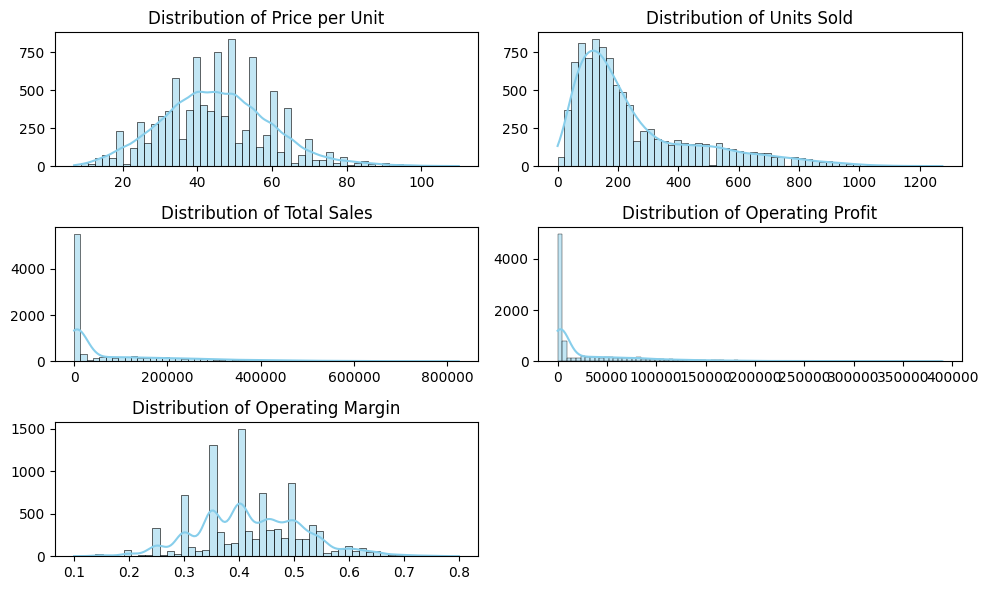

In [135]:
# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs = axs.flatten()

# Plot each histogram
for i, col in enumerate(rel_cols):
    sns.histplot(data[col], ax=axs[i], color='skyblue', kde=True)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('')

# Turn off unused subplots (if fewer than 6 columns)
for j in range(len(rel_cols), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


## Notes
- Price per Unit and Operating Margin both follow a distribution that is approximately normal, though not perfectly. They show a bell-shaped curve with slight deviations from symmetry.

- Total Sales, Operating Profit, and Units Sold are all right-skewed, meaning the majority of values are clustered on the lower end, with a long tail extending to the right.

- This indicates that while most transactions are relatively modest in value and volume, there are a few high-performing entries (possibly large orders or high-revenue items) that significantly raise the upper range of the data.